# Random Forests

- 'Random' - each tree gets some unique training data randomly - so helps against overfitting !

- 'Forest' because it is a collection - an ensemble - of decision trees!

- It's like cross-validation meets decision tree.

**Aside: Awesome data visualisation website** http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

| concept | description |
|:-------:|:-----------:|
| decision tree | a classification model constructing questions|
| root node | the first question a tree asks |
| leaf node | the result of the last question |
| depth | number of consecutive questions |
| CART (Classification & Regression Tree)| name of the tree construction algorithm |
| GINI | a metric for the purity of nodes |
| ensemble | a model consisting of many sub-models |
| Random Forest | an ensemble of randomized decision trees |
| Gradient Boosting | a deluxe tree-based ensemble model |

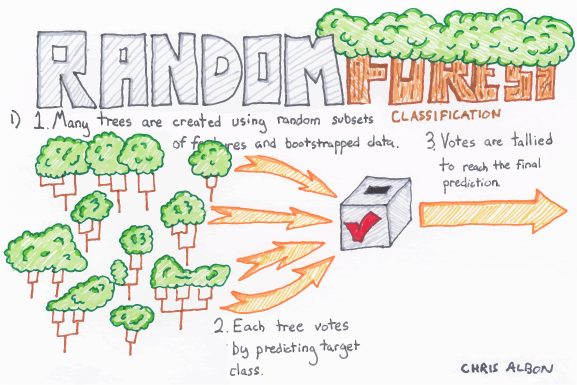

## Let's try out a Random Forest Classifier in Scikit-Learn

Train and fine-tune a Random Forest on the Titanic dataset.
- experiment with the hyperparameters `max_depth` and `n_estimators`
- compare your model to the Decision Tree model


### **1. Read Data in Pandas**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### **2. Split data - Select columns - into X and y**

**Note:** Now we're gonna purposefuly not choose 'Age' and 'cabin' so that we don't have missing values

In [4]:
X = df[['Pclass', 'Sex', 'Fare']]
y = df['Survived']

In [5]:
len(X) == len(y)

True

### **3. Split X data into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 3), (223, 3), (668,), (223,))

### **4. Feature Engineering** 

In [8]:
# pd.get_dummies(X_train['Sex']).head()

In [9]:
# Four options for encoding strings to numbers:
# 1. LabelEncoder
# 2. pd.factorize()
# 3. pd.get_dummies()
# 4. .map() - Probably the best option here!
    
# d = {'female': 0, 'male': 1}

# X_train = X_train.copy() # gets rid of warning!!
# X_train['Sex'] = X_train['Sex'].map(d)
# X_train.head()

### We now have X_train data that has different columns compared to the original dataframe, therefore we need to be able to apply these changes to the X_test dataframe too - We need to write a function!


In [10]:
def feature_engineer(dataframe):
    
    d = {'female': 0, 'male': 1}

    dataframe = dataframe.copy() # just to supress pandas warning!!
    dataframe['Sex'] = dataframe['Sex'].map(d)
    
    return dataframe

In [11]:
X_train = feature_engineer(X_train)
X_train.head()

,Pclass,Sex,Fare
PassengerId,,,
299,1,1,30.5000
885,3,1,7.0500
248,2,0,14.5000
479,3,1,7.5208
306,1,1,151.5500


### **5. "Build" a Random Forest model**

`m = RandomForestClassifier()`

In [12]:
m = RandomForestClassifier(n_estimators=3, max_depth=2, criterion='gini' )

In the brackets, we can now introduce the hyperparameters:
- number of trees i.e. n_estimators
- number of levels/depth - how many questions deep you want it to go
- criterion - RandomForest is using the gini index to split the data as well as possible

### The GINI index

The GINI index is used to evaluate which partition results in the best separation of the classes K:

\begin{align}
G = \sum_{k=1}^{K}{(p_k (1 - p_k))}
\end{align}
Where p indicates the proportion of points belonging to class K.

**Which is the best possible GINI score, which the worst?**

### **6. Train the model**

In [13]:
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
m.score(X_train, y_train)

0.7874251497005988

#### Now we check the test data (remember we wrote a function earlier!)

In [15]:
X_test = feature_engineer(X_test)

In [16]:
m.score(X_test, y_test)

0.7713004484304933

### Now we want to optimise both our train and test scores: change the hyperparameter values (will see how to optimise these tomorrow)

In [17]:
m = RandomForestClassifier(n_estimators=50000, max_depth=60000, 
                           criterion='gini')

In [18]:
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60000, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
m.score(X_train, y_train)

0.9086826347305389

In [20]:
m.score(X_test, y_test)

0.8251121076233184

**Parameters**: selecting the right questions - in order to maximise the gini algorithm!

**Hyperparameters**: See next lesson

**Notable features**:
- fast
- great starter  
- but difficult to interpret

### Pros and Cons of Random Forests
| Pros | Cons |
|:----:|:----:|
|handle a mix of categorical and scalar data | prone to overfitting |
|automatically select important features| don’t calculate probabilities |
|produce high-quality models | sensitive to transformations of the data |
|can be used for regression, too | e.g. rotations |
|great as a “first shot” | regression trees cannot extrapolate |
|fast |  |